In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

In [2]:
path = '/content/mobile_ads.csv'
df = pd.read_csv(path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.shape

(400, 5)

In [9]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [10]:
df = df.drop_duplicates() #dropped the duplicated values if any

In [11]:
df.Purchased.value_counts() #boolean metric

,count
Purchased,
0,257
1,143


In [12]:
df.nunique()  #cardinality test

,0
User ID,400
Gender,2
Age,43
EstimatedSalary,117
Purchased,2


**EDA_Visualization**

Text(0.5, 1.0, 'Target distribution')

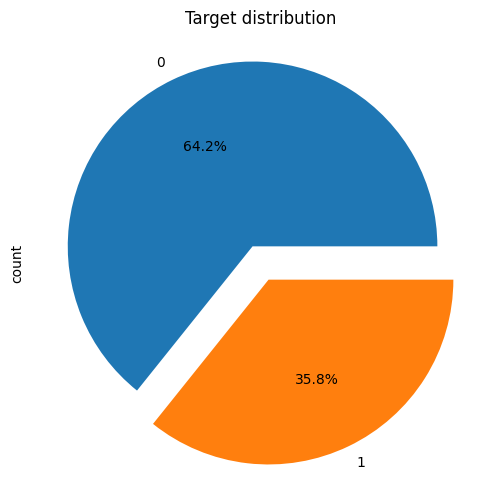

In [13]:
plt.figure(figsize=(6,6))

# Pie plot
df['Purchased'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%').set_title("Target distribution")

**When the target variable is imbalanced across the population, one solution is to address this issue by either under-sampling the majority class or over-sampling the minority class. One effective technique for over-sampling is the Synthetic Minority Over-sampling Technique (SMOTE), which generates synthetic samples for the minority class to balance the dataset. This approach helps improve the performance of machine learning models by providing a more representative distribution of the target classes.**

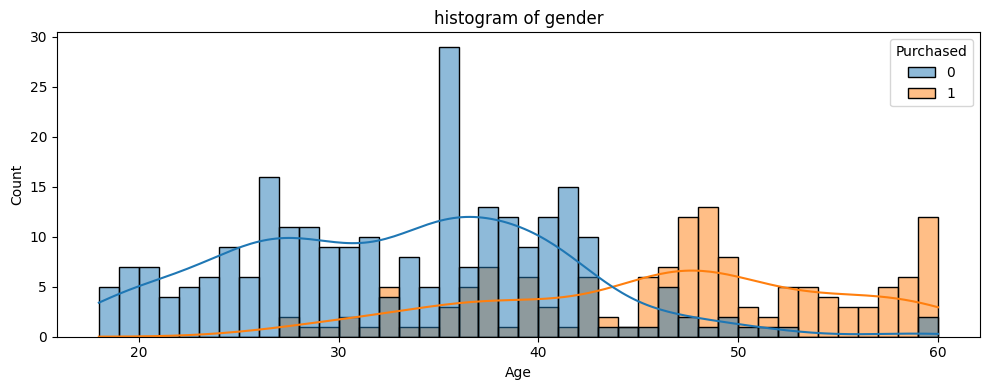

In [14]:
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='Age',hue='Purchased',binwidth=1,kde=1)
plt.title("histogram of gender")
plt.tight_layout()
plt.show()

age below 30 were less likely to purchase than not
age more than 45-60 were more likely to purchase or not insight :
can create a feature for age ranges adult , adolescent or teen but not that necessary **bold text**

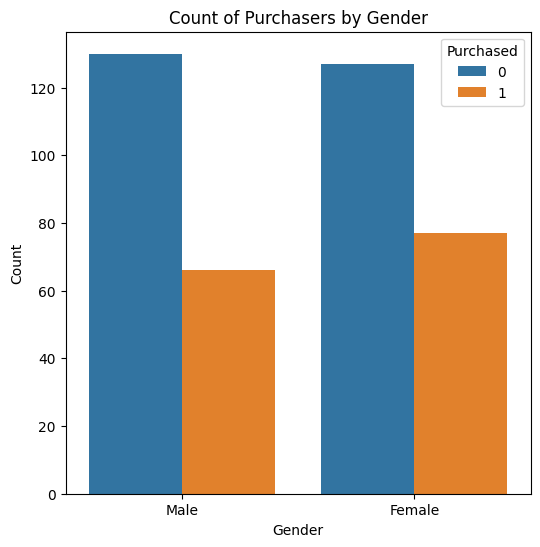

In [16]:
# gender propotion in purchasing
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', hue='Purchased', data=df)
plt.title('Count of Purchasers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**It has seen from the histogram the propotion is very much equally distributed in both of the genders**

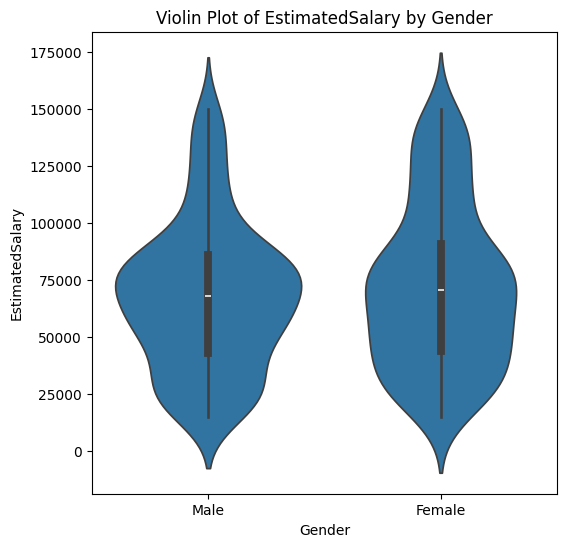

In [18]:
plt.figure(figsize=(6, 6))
sns.violinplot(x='Gender', y='EstimatedSalary', data=df)
plt.title('Violin Plot of EstimatedSalary by Gender')
plt.xlabel('Gender')
plt.ylabel('EstimatedSalary')
plt.show()

Below code performs the following tasks:

**Label Encoding of Categorical Data:**

The LabelEncoder from sklearn.preprocessing is used to convert the categorical Gender column (which contains text values like 'Male' or 'Female') into numeric values (e.g., 0 or 1).

The encoded values are stored in a new column called GenderEncode.

**Correlation Matrix: **

After encoding the Gender column, the code calculates the correlation matrix for the remaining numerical columns in the DataFrame using the .corr() function.

It drops the original Gender column before calculating the correlations since it is now represented numerically in GenderEncode.

**Heatmap Visualization:**

The correlation matrix is visualized as a heatmap using seaborn.heatmap(). This helps to visually analyze the relationships between different features in the dataset.

The annot=True argument adds the correlation values directly on the heatmap, and cmap='coolwarm' applies a color scheme to represent the correlation values.

**Purpose:**
Label Encoding: To convert categorical features (like 'Gender') into numerical values for use in machine learning models.

Correlation Matrix: To understand the relationships between numeric variables and identify which features are correlated.

Heatmap: To visually represent and easily interpret the correlation between features.

In summary, the code is used to preprocess categorical data and generate a visual representation of the correlations between numerical features in the dataset.

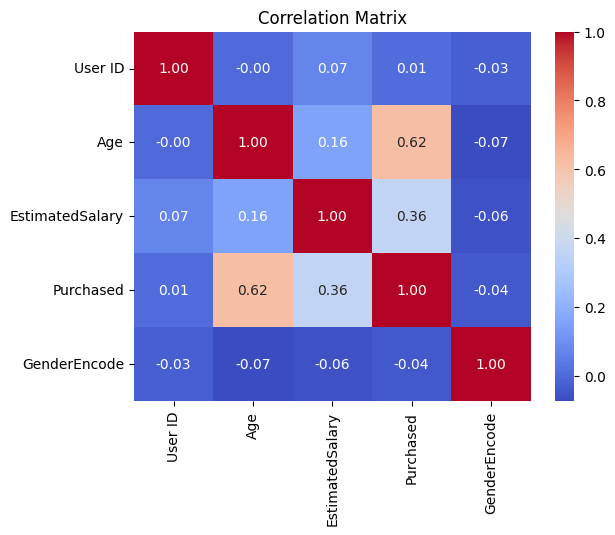

In [20]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

df['GenderEncode'] = LabelEncoder().fit_transform(df['Gender'])  # Encoding 'Gender'
sns.heatmap(df.drop('Gender', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


**Simply use of Traditional Machine Learning model and checking accuracy. Then after checking accuracy using Neural network.**

In [26]:
# Splitting the dataset into features (X) and target (y)
X = df[['Age', 'EstimatedSalary', 'GenderEncode']]  # Features
y = df['Purchased']  # Target

# Splitting the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import classification_report, accuracy_score
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8875
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91        52
           1       0.83      0.86      0.84        28

    accuracy                           0.89        80
   macro avg       0.87      0.88      0.88        80
weighted avg       0.89      0.89      0.89        80



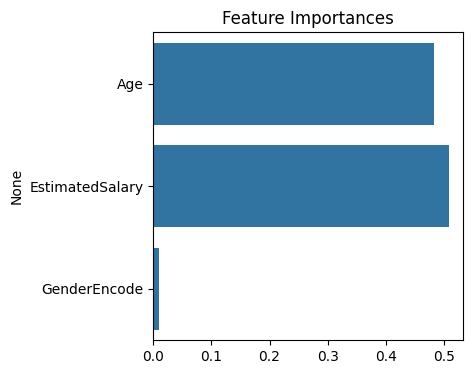

In [31]:
# Optional: Plot feature importances
importances = model.feature_importances_
features = X.columns

# Plotting the feature importances
plt.figure(figsize=(4, 4))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()

**The accuracy using Simple Random forest classifier is 88.75%**

In [21]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def nueralnet(X_train,X_test,y_train,y_test):
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(3,)),  # Input layer with 10 features
            tf.keras.layers.Dense(64, activation='relu'),  # Dense hidden layer with ReLU activation
            tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)
        loss, accuracy = model.evaluate(X_test, y_test)
        print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

In [22]:
from sklearn.metrics import accuracy_score
def lossfn(ytrue , pred):
        accuracy = accuracy_score(ytrue, pred)
        return accuracy

In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

def randomforest(X_train,X_test,y_train,y_test):
    rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

    # Train the model on the training data
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {accuracy:.4f}')

def xgb(X_train,X_test,y_train,y_test):
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [150, 180, 220],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
    }

    # Instantiate the XGBClassifier
    xgb_classifier = XGBClassifier(random_state=42)

    # Create GridSearchCV
    grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters
    print("Best Hyperparameters:", grid_search.best_params_)

    # Make predictions on the test data using the best model
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Test Accuracy: {accuracy:.4f}')

In [24]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,GenderEncode
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [25]:
x = df.drop(['Purchased','Gender','User ID'],axis=1)
y = df['Purchased']

xtrain , xtest , ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=3)
print("nueral net ")
nueralnet(xtrain,xtest,ytrain,ytest)
print("randomforest ")
randomforest(xtrain,xtest,ytrain,ytest)
print("XGBClassifier")
xgb(xtrain,xtest,ytrain,ytest)

nueral net 
Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.6192 - loss: 0.7226 - val_accuracy: 0.6250 - val_loss: 0.6842
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6786 - loss: 0.6551 - val_accuracy: 0.6250 - val_loss: 0.6431
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6309 - loss: 0.6352 - val_accuracy: 0.6250 - val_loss: 0.6066
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6104 - loss: 0.6016 - val_accuracy: 0.7812 - val_loss: 0.5720
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7468 - loss: 0.5629 - val_accuracy: 0.7812 - val_loss: 0.5427
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7637 - loss: 0.5423 - val_accuracy: 0.8125 - val_loss: 0.5160
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8166 - loss: 0.5062 - val_accuracy: 0.8438 - val_loss: 0.4923
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8012 - loss: 0.4894 - val_accuracy: 0.8438 - val_loss:

**Using XGBClassifier is perfo**rming the best out of those in this and giving **us an accuracy of**

**88.75% **